# TUGAS 1 : Menghitung Jarak


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library yang diperlukan
import pandas as pd
import math 
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# membaca data csv
anime = pd.read_csv("https://raw.githubusercontent.com/callmezamm/datamining/main/TopAnimatedImDb.csv")
print(anime)

                                Title  Rating      Votes     Gross  \
0       Sen to Chihiro no kamikakushi     8.6    747,148   $10.06M   
1                       The Lion King     8.5  1,041,158  $422.78M   
2                      Hotaru no haka     8.5    272,469       NaN   
3                      Kimi no na wa.     8.4    259,975    $5.02M   
4   Spider-Man: Into the Spider-Verse     8.4    510,227  $190.24M   
..                                ...     ...        ...       ...   
80                      Kung Fu Panda     7.6    463,897  $215.43M   
81                              Mulan     7.6    284,542  $120.62M   
82                 The Little Mermaid     7.6    260,026  $111.54M   
83                    The Jungle Book     7.6    181,528  $141.84M   
84    Snow White and the Seven Dwarfs     7.6    197,860  $184.93M   

                 Genre  Metascore Certificate             Director  Year  \
0    Adventure, Family       96.0           U       Hayao Miyazaki  2001   
1     A

In [ ]:
anime.head()

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime
0,Sen to Chihiro no kamikakushi,8.6,"747,148",$10.06M,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125 min
1,The Lion King,8.5,"1,041,158",$422.78M,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88 min
2,Hotaru no haka,8.5,"272,469",NaN,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89 min
3,Kimi no na wa.,8.4,"259,975",$5.02M,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106 min
4,Spider-Man: Into the Spider-Verse,8.4,"510,227",$190.24M,"Action, Adventure",87.0,U,Bob Persichetti,2018,['\nTeen Miles Morales becomes the Spider-Man ...,117 min


NOMINAL

In [ ]:
def nom_anime(a,b):
  p = 7
  q = 0
  for col in ["Title", "Genre", "Certificate", "Director", "Description","Year", "Runtime"]:
    if anime[col][a]==anime[col][b]:
      q += 1
  return (p-q)/p

In [ ]:
print(nom_anime(1,2))
print(nom_anime(1,3))
print(nom_anime(1,4))

0.8571428571428571
0.8571428571428571
0.8571428571428571


NUMERIK

In [ ]:
#menampilkan data numerik
anime[["Rating", "Metascore"]].head()

,Rating,Metascore
0,8.6,96.0
1,8.5,88.0
2,8.5,94.0
3,8.4,79.0
4,8.4,87.0


In [ ]:
anime.describe()

,Rating,Metascore,Year
count,85.000000,80.000000,85.000000
mean,7.922353,80.850000,2003.211765
std,0.257449,8.965616,15.255830
min,7.600000,59.000000,1937.000000
25%,7.700000,74.000000,1995.000000
50%,7.900000,82.000000,2007.000000
75%,8.100000,87.000000,2014.000000
max,8.600000,96.000000,2021.000000


In [ ]:
#normalisasi rating
std_rat = 0.257449
mean_rat = 7.922353
for col1 in ["Rating"]:
    anime1 = anime[col1]
    hasil1 = (anime1-mean_rat)/std_rat
    print(hasil1)

#normalisasi metascore
std_met = 8.965616
mean_met = 80.850000
for col2 in ["Metascore"]:
    anime2 = anime[col2]
    hasil2 = (anime2-mean_met)/std_met
    print(hasil2)

0     2.632160
1     2.243734
2     2.243734
3     1.855307
4     1.855307
        ...   
80   -1.252104
81   -1.252104
82   -1.252104
83   -1.252104
84   -1.252104
Name: Rating, Length: 85, dtype: float64
0     1.689789
1     0.797491
2     1.466715
3    -0.206344
4     0.685954
        ...   
80   -0.764030
81   -1.098642
82    0.797491
83   -1.767865
84    1.578252
Name: Metascore, Length: 85, dtype: float64


In [ ]:
# Menghitung jarak data Numeric dengan cara Euclidean
def num_anime(a,b,c):
    result = 0
    for col in [hasil1, hasil2]:
        result = math.pow(abs(col[a] - col[b]), c)
    return result**(1/c)

In [ ]:
print(num_anime(1,2,2))
print(num_anime(1,3,2))
print(num_anime(1,4,2))

0.6692233974776524
1.0038350962164784
0.11153723291294204


SIMILARITY

In [ ]:
print("Jarak d(1,2) =", nom_anime(1,2)+num_anime(1,2,2))


Jarak d(1,2) = 1.5263662546205095


In [ ]:
print("Jarak d(1,3) =", nom_anime(1,3)+num_anime(1,3,3))

Jarak d(1,3) = 1.8609779533593356


In [ ]:
print("Jarak d(1,4) =", nom_anime(1,4)+num_anime(1,4,4))

Jarak d(1,4) = 0.9686800900557991


# TUGAS 2 : Diskritisasi 

## load file csv

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
sepalLeght = iris.SepalLengthCm

In [ ]:
xx = sepalLeght.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(xx)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
sLeght =est.transform(xx)

In [ ]:
df_sl = pd.DataFrame(sLeght, columns = ["Sepal Lenght"])

In [ ]:
df_sl

,Sepal Lenght
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [ ]:
sepalWidth = iris.SepalWidthCm

In [ ]:
sw = sepalWidth.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(sw)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
sWidth =est.transform(sw)

In [ ]:
df_sw = pd.DataFrame(sWidth, columns = ["Sepal Width"])

In [ ]:
df_sw

,Sepal Width
0,2.0
1,1.0
2,2.0
3,1.0
4,2.0
...,...
145,1.0
146,0.0
147,1.0
148,2.0


In [ ]:
petalLength = iris.PetalLengthCm

In [ ]:
pl = petalLength.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(pl)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
pLenght =est.transform(pl)

In [ ]:
df_pl = pd.DataFrame(pLenght, columns = ["Petal Lenght"])

In [ ]:
df_pl

,Petal Lenght
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [ ]:
petalWidth = iris.PetalWidthCm

In [ ]:
pw = petalWidth.values.reshape(-1, 1)

In [ ]:
est = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy='uniform')

In [ ]:
est.fit(pw)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [ ]:
KBinsDiscretizer(...)

KBinsDiscretizer(n_bins=Ellipsis)

In [ ]:
pWidth =est.transform(pw)

In [ ]:
df_pw = pd.DataFrame(pWidth, columns = ["Petal Width"]) 

In [ ]:
df_pw

,Petal Width
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,3.0
146,3.0
147,3.0
148,3.0


In [ ]:
df_list = [df_sl, df_sw, df_pl, df_pw, iris.Species]
df_full=pd.concat(df_list, axis=1)

In [ ]:
df_full

,Sepal Lenght,Sepal Width,Petal Lenght,Petal Width,Species
0,0.0,2.0,0.0,0.0,Iris-setosa
1,0.0,1.0,0.0,0.0,Iris-setosa
2,0.0,2.0,0.0,0.0,Iris-setosa
3,0.0,1.0,0.0,0.0,Iris-setosa
4,0.0,2.0,0.0,0.0,Iris-setosa
...,...,...,...,...,...
145,2.0,1.0,2.0,3.0,Iris-virginica
146,2.0,0.0,2.0,3.0,Iris-virginica
147,2.0,1.0,2.0,3.0,Iris-virginica
148,2.0,2.0,2.0,3.0,Iris-virginica


In [ ]:
df_full.to_csv("irisdata.csv")

# TUGAS 3 : K-Nearest Neighboor 

In [ ]:
# import library yang diperlukan
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import metrics
k_range = range(1,26)
scores = {}
score_list = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred= knn.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test, y_pred)
  score_list.append(metrics.accuracy_score(y_test, y_pred))


Text(0, 0.5, 'testing accuracy')

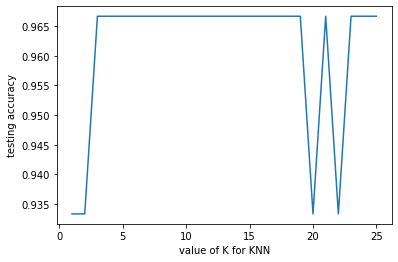

In [ ]:
%matplotlib inline

plt.plot(k_range, score_list)
plt.xlabel('value of K for KNN')
plt.ylabel('testing accuracy')

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

new = [[3,2,4,4], [5,4,2,2]]
y_predict = knn.predict(new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


# TUGAS 4 : NAIVE BAYES GAUSSIAN


In [ ]:
# import library yang diperlukan
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Spliting the dataset in independent and dependent variables
X = iris.iloc[:,:4].values
y = iris['Species'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  30
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


# TUGAS 5 : K-MEAN CLUSTERING

Import data set dan import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = iris.iloc[:, [1, 2, 3, 4]].values

In [ ]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

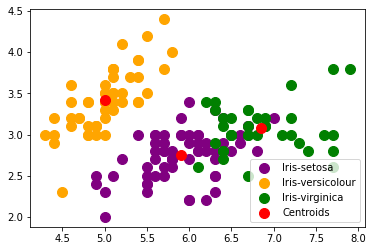

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# TUGAS 6 : DECISION TREE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv")

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris['Sepal_diff'] = iris['SepalLengthCm']-iris['SepalWidthCm']
iris['Petal_diff'] = iris['PetalLengthCm']-iris['PetalWidthCm']

In [ ]:
iris['Sepal_Petal_len_diff'] = iris['SepalLengthCm']-iris['PetalLengthCm']
iris['Sepal_Petal_width_diff'] = iris['SepalWidthCm']-iris['PetalWidthCm']

In [ ]:
iris['Sepal_Petal_len_wid_diff'] = iris['SepalLengthCm']-iris['PetalLengthCm']
iris['Sepal_Petal_wid_len_diff'] = iris['SepalWidthCm']-iris['PetalWidthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_width_diff,Sepal_Petal_len_wid_diff,Sepal_Petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,1.5,0.7
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,1.3,0.6
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,1.3,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,0.8,1.1


In [ ]:
iris.drop(['Id'],axis=1, inplace=True)

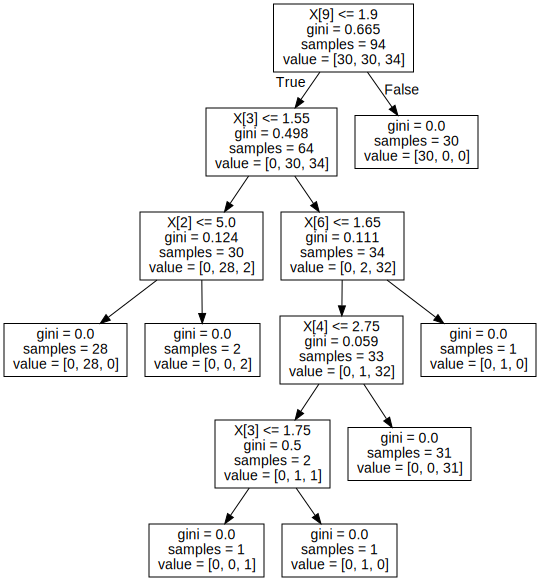

In [ ]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# memisahkan variable independen dan variable target dari data iris

x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Sepal_diff','Petal_diff', 'Sepal_Petal_len_diff', 'Sepal_Petal_width_diff', 'Sepal_Petal_len_wid_diff', 'Sepal_Petal_wid_len_diff']]
y = iris['Species']

# sebelum melatih model kota split data kita dulu kedalam data train dan data test untuk tujuan validasi
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.30, random_state=42)

# split data ke validasi train dan validasi test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

# membuat decision tree clasifikasi dan melatihnya dengan training dataset
iris_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_clf.fit(Xt,Yt)

# visualisasi tree berdasarkan train dataset
dot_data = tree.export_graphviz(iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# cek validasi test data pada training model dan mendapatkan peforma matriks

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = iris_clf.predict(Xcv)

print('Accuracy sccore for validation test is: ',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv, Y_hat)

Accuracy sccore for validation test is:  0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [ ]:
YT_hat = iris_clf.predict(Xtest)
YT_hat

print("model accuracy score on totally unseen data(Xtest) is:",accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_hat)

model accuracy score on totally unseen data(Xtest) is: 93.33333333333333 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 2, 11]],

       [[30,  2],
        [ 1, 12]]])

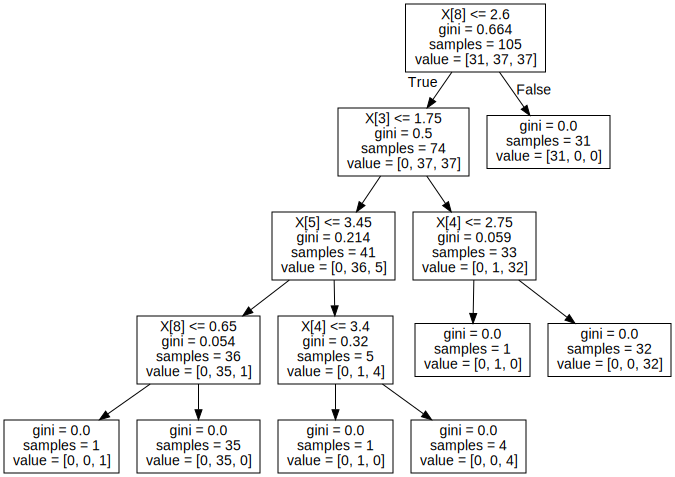

In [ ]:
iris_Fclf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_Fclf.fit(Xtrain, Ytrain)

# visualisasi tree berdasarkan train dataset
dot_data = tree.export_graphviz(iris_Fclf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [ ]:
YT_FHat = iris_Fclf.predict(Xtest)
YT_FHat

print("model accuracy score on totally unseen data(Xtest) is:",accuracy_score(Ytest, YT_FHat)*100,'%')

model accuracy score on totally unseen data(Xtest) is: 100.0 %


# UTS : NAIVE BAYES & DECISION TREE PADA DATA SET KANKER PAYUDARA COIMBRA

NAIVE BAYES

In [ ]:
# import library yang diperlukan
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# import data set dari github
data = pd.read_csv("https://raw.githubusercontent.com/callmezamm/datamining/main/dataR2.csv")

In [ ]:
# menampilkan 5 data teratas pada dataset
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
# variable independen
x = data.drop(["Classification"], axis=1)
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
# varible dependent
y = data["Classification"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [ ]:
# mengaktifkan fungsi untuk membagi data dari library sklearn. data kanker payudara dibagi menjadi 2 bagian yaitu x test dan x train dari variable independent dan y test dan y train dari variable dependent
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=80)

In [ ]:
# import fungsi naive bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes
naive_bayes = GaussianNB()

In [ ]:
# masukkan data training pada fungsi klasifikasi naive bayes
trainnb = naive_bayes.fit(x_train,y_train)

In [ ]:
# menghitung jumlah pada class-class dari model trainnb
trainnb.class_count_

array([45., 47.])

In [ ]:
# menentukan hasil predict dari x_test
y_pred = trainnb.predict(x_test)
y_pred

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 1])

In [ ]:
# menentukan probabilitas dari hasil prediksi yang telah dilakukan pada tahap sebelumnya
trainnb.predict_proba(x_test)

array([[9.91871362e-01, 8.12863848e-03],
       [9.85876892e-01, 1.41231077e-02],
       [2.76067134e-04, 9.99723933e-01],
       [1.17673615e-11, 1.00000000e+00],
       [9.68129128e-01, 3.18708721e-02],
       [6.24634259e-01, 3.75365741e-01],
       [9.54826661e-01, 4.51733390e-02],
       [2.35902371e-02, 9.76409763e-01],
       [9.87379188e-01, 1.26208125e-02],
       [9.89298759e-01, 1.07012413e-02],
       [2.41510558e-40, 1.00000000e+00],
       [1.04554069e-16, 1.00000000e+00],
       [9.68351724e-01, 3.16482758e-02],
       [9.88991567e-01, 1.10084328e-02],
       [9.00346145e-01, 9.96538551e-02],
       [9.41996610e-01, 5.80033901e-02],
       [8.62853834e-03, 9.91371462e-01],
       [9.91699952e-01, 8.30004753e-03],
       [9.02428935e-02, 9.09757107e-01],
       [3.13575959e-01, 6.86424041e-01],
       [7.37319063e-01, 2.62680937e-01],
       [9.30349353e-01, 6.96506473e-02],
       [6.22036849e-30, 1.00000000e+00],
       [9.61487935e-01, 3.85120654e-02]])

Hasil prediksi data test diatas menunjukkan bahwa matriks kolom pertama merupakan probabilitas untuk klasifikasi bernilai 1 dan matriks kolom kedua merupakan probabilitas untuk klasifikasi bernilai 2. Dengan membandingkan probabilitas dari dua klasifikasi diatas, maka klasifikasi yang memiliki nilai probabilitas lebih tinggi akan menjadi hasil yang diprediksikan.

Selanjutnya import fungsi confusion matrix dari package scikit-learn. Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi. Tampilkan nilai akurasi dari y test yang dibandingkan dengan y prediksi.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 5,  2],
       [10,  7]])

Berdasarkan output diatas diketahui bahwa dengan metode naive bayes :
- Frekuensi prediksi seseorang tergolong healthy control (1) dan data aktual sesuai atau benar tergolong healthy control (1) adalah sebanyak 5 orang. Keadaan seperti ini disebut juga sebagai true positive
- Frekuensi prediksi seseorang tergolong patients (2) namun data aktual menunjukkan sebagai healthy control (1) sebanyak 2 orang. Kasus seperti ini disebut sebagai false positive.
- Frekuensi prediksi seseorang tergolong healthy control (1) namun data aktual menunjukkan sebagai patients (2) sebanyak 10 orang. Keadaan seperti ini disebut sebagai false negative
- Frekuensi prediksi seseorang tergolong patients(2) dan data aktual sesuai atau benar tergolong patients (2) adalah sebanyak 7 orang. Keadaan seperti ini disebut sebagai true negative.

In [ ]:
# melihat laporan klasifikasi yang memberikan rincian setiap kelas dengan presusi, daya ingat, skor akhir dan dukungan menggunakan classification_report yang diimport dari sckit-learn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.71      0.45         7
           2       0.78      0.41      0.54        17

    accuracy                           0.50        24
   macro avg       0.56      0.56      0.50        24
weighted avg       0.65      0.50      0.51        24



Untuk mengetahui nilai akurasi dengan model yang ada maka lakukan perhitungan berikut : (True Positive / True Negative )/ n

In [ ]:
akurasi = (5+7)/24
akurasi

0.5

DECISION TREE

In [ ]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
# import data set dari github
data = pd.read_csv("https://raw.githubusercontent.com/callmezamm/datamining/main/dataR2.csv")

In [ ]:
# menampilkan 5 data awal pada data set
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
# melihat clasifikasi dari data
data.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [ ]:
# variable independen
x = data.drop(["Classification"], axis=1)
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
# varible dependent
y = data["Classification"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [ ]:
# memanggil fungsi tree dari package sklearn
from sklearn import tree
# membuat varible clf untuk menampung hasil dari desision tree
clf = tree.DecisionTreeClassifier(criterion="gini")
# memfit atau menggabungkan dalam variable clf varibale independent dan variable dependent
clf = clf.fit(x, y)

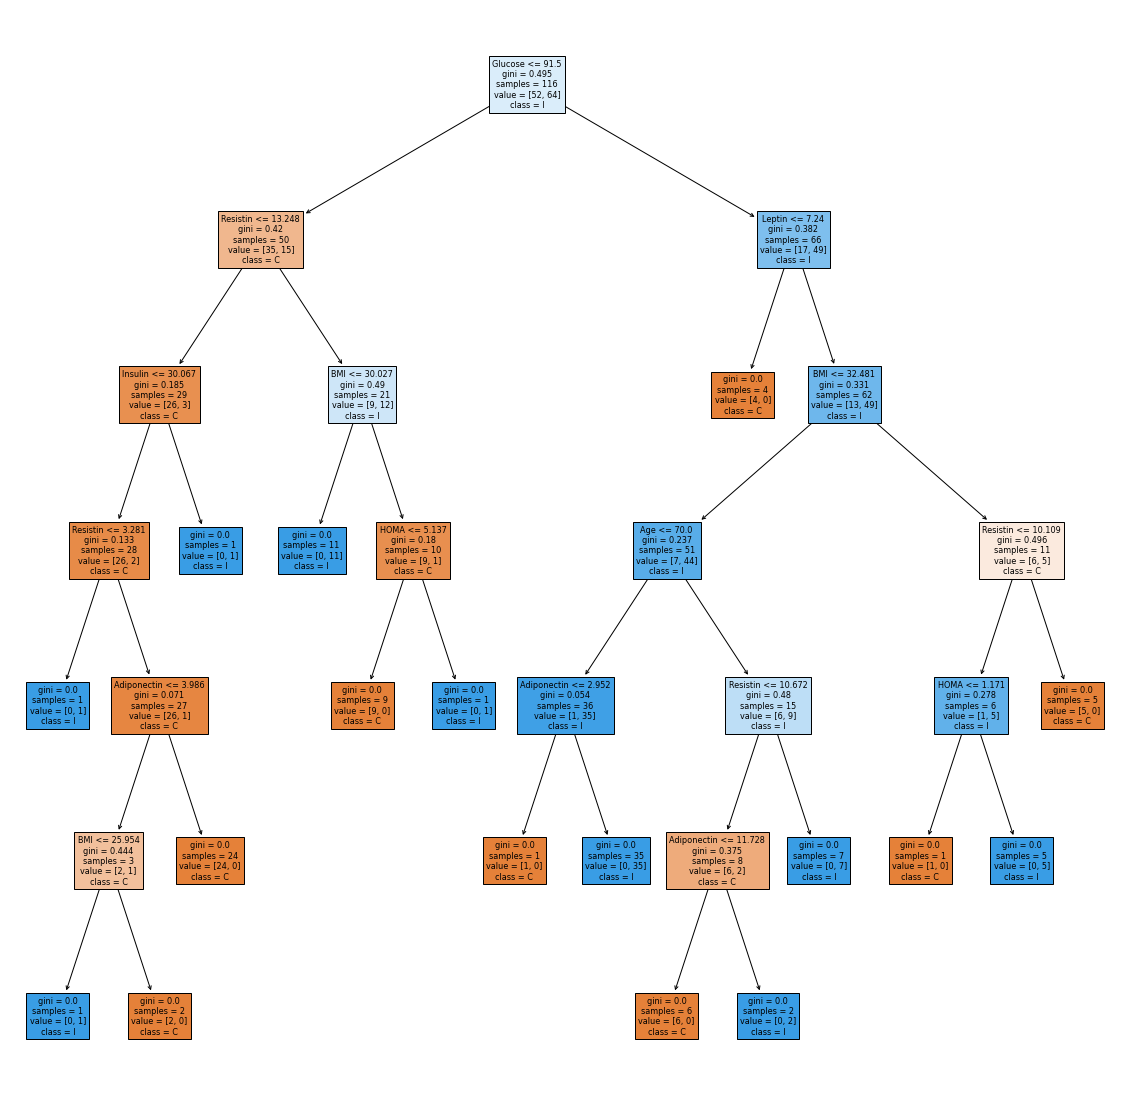

In [ ]:
# memanggil library matplotlib dan memanggil fungsi pyplot untuk membuat visualisasi dari tree
from matplotlib import pyplot as plt
# membuat konfigurasi dari tree
fig = plt.figure(figsize=(20,20)) #ukuran tree
trees = tree.plot_tree(clf, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9], filled=True) #bentuk tree diambil dari variable clf dan nama fitur diambil dari kolom 0-8 dan nama class diambil dari kolom ke 9

In [ ]:
# membuat varible clf untuk menampung hasil dari desision tree
clf = tree.DecisionTreeClassifier(criterion="gini")
# memfit atau menggabungkan dalam variable clf varibale x_train dan variable y_train
clf = clf.fit(x_train, y_train)

# menentukan hasil predict dari x_test
y_pred = clf.predict(x_test)

In [ ]:
# memanggil fungsi metrics pada package sklear
from sklearn import metrics
# melihat akurasi dari y_pred
print("akurasi", metrics.accuracy_score(y_test, y_pred))

akurasi 0.75


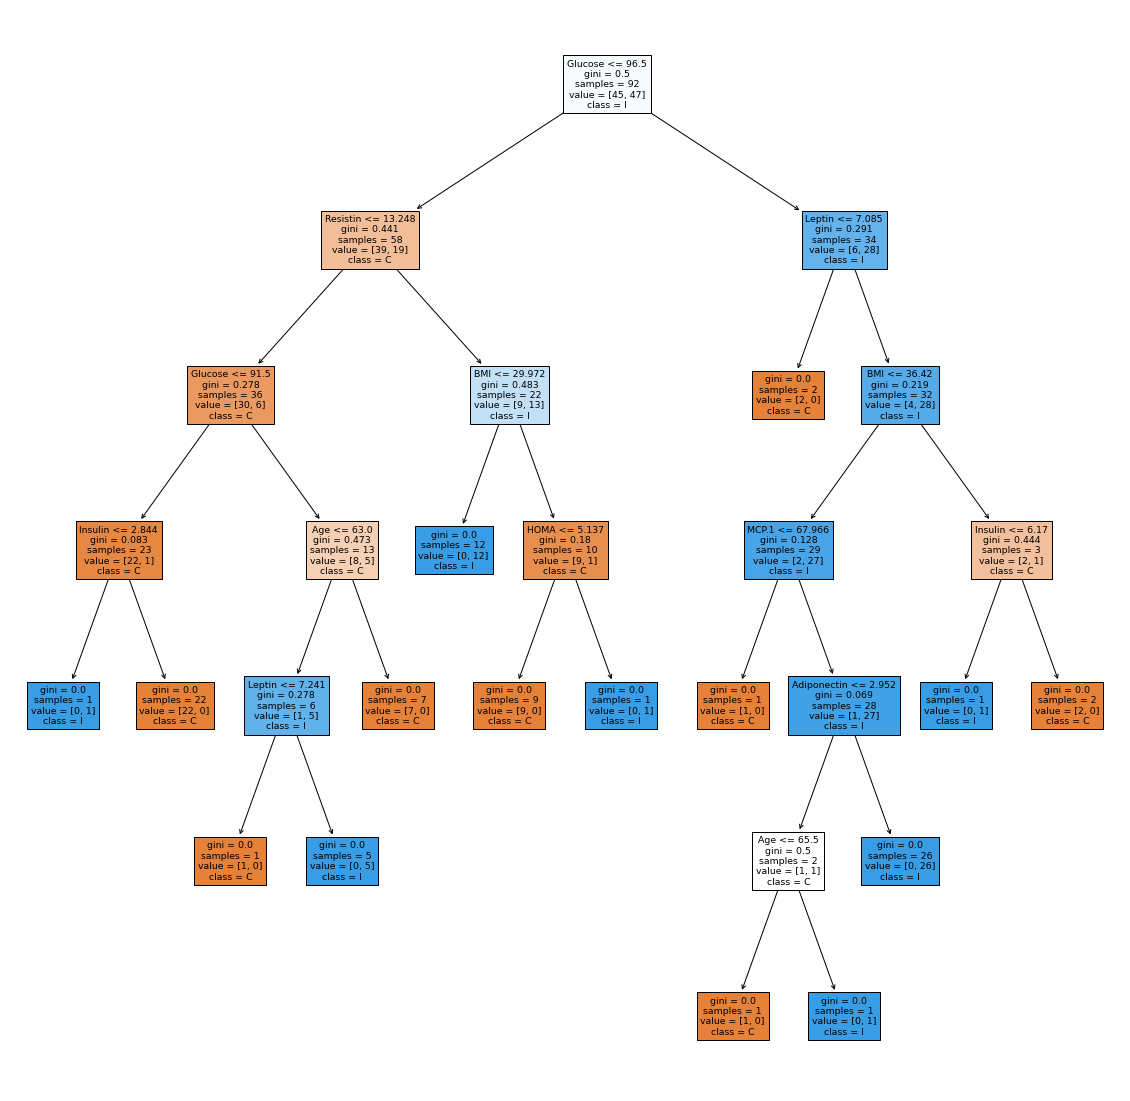

In [ ]:
# memanggil library matplotlib dan memanggil fungsi pyplot untuk membuat visualisasi dari tree
from matplotlib import pyplot as plt
# membuat konfigurasi dari tree
fig = plt.figure(figsize=(20,20))
trees = tree.plot_tree(clf,feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9], filled=True)#bentuk tree diambil dari variable clf dan nama fitur diambil dari kolom 0-8 dan nama class diambil dari kolom ke 9

Berdasarkan pada 2 metode tersebut yakni naive bayes dan decision tree, diperoleh akurasi prediksi naive bayes 0.5 (50%) dan decision tree 0.75(75%). metode decision tree memiliki nilai akurasi lebih tinggi dari naive bayes. sehingga dianggap bahwa klasifikasi menggunakan decision tree lebih baik dibandingkan naive bayes untur mengklasifikasi data kanker payudara atau breast cancer in combria 

# TUGAS 7 : ANALISIS DATA CREDIT

PRE PROCESSING 
- TRANSFORMASI DATA CATEGORICAL TO NUMERIK
- NORMALISASI DATA NUMERIK MENGGUNAKAN MIN MAX (0,1)

In [ ]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/data mining/credit_score.xlsx')

In [ ]:
data.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


NORMALISASI

In [ ]:
X = data.drop(columns=["risk_rating"])

In [ ]:
split_overdue_X = pd.get_dummies(X["rata_rata_overdue"], prefix="overdue")
X = X.join(split_overdue_X)

In [ ]:
X = X.drop(columns = "rata_rata_overdue")

In [ ]:
labels = data["risk_rating"]

In [ ]:
KPR_status = pd.get_dummies(X["kpr_aktif"], prefix="KPR")
X = X.join(KPR_status)

In [ ]:
X = X.drop(columns = "kpr_aktif")

In [ ]:
old_normalize_feature_labels = ['pendapatan_setahun_juta', 'durasi_pinjaman_bulan', 'jumlah_tanggungan']
new_normalized_feature_labels = ['norm_pendapatan_setahun_juta', 'norm_durasi_pinjaman_bulan', 'norm_jumlah_tanggungan']
normalize_feature = data[old_normalize_feature_labels]

In [ ]:
scaler = MinMaxScaler()

scaler.fit(normalize_feature)

normalized_feature = scaler.transform(normalize_feature)

normalized_feature_df = pd.DataFrame(normalized_feature, columns = new_normalized_feature_labels)

In [ ]:
X = X.drop(columns = old_normalize_feature_labels)

In [ ]:
X = X.join(normalized_feature_df)

In [ ]:
X = X.join(labels)

In [ ]:
subject_lables = ["Unnamed: 0",  "kode_kontrak"]
X = X.drop(columns = subject_lables)

In [ ]:
percent_amount_of_test_data = 0.3

In [ ]:
# values
matrices_X = X.iloc[:,0:10].values

# classes
matrices_Y = X.iloc[:,10].values

X_1 = X.iloc[:,0:10].values
Y_1 = X.iloc[:, -1].values

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(matrices_X, matrices_Y, test_size = percent_amount_of_test_data, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = percent_amount_of_test_data, random_state=0)

In [ ]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

### Dictionary to store model and its precision

model_precision = OrderedDict()

### Dictionary to store model and its recall

model_recall = OrderedDict()

MODELING DENGAN NAIVE BAYES DAN KNN

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
Y_pred_nb = naive_bayes_classifier.predict(X_test)

In [ ]:
# K-Nearest Neighboor
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    Y_pred_knn = knn.predict(X_test)

In [ ]:
naive_bayes_accuracy = round(100 * accuracy_score(y_test, Y_pred_nb), 2)

In [ ]:
knn_accuracy = round(100 * accuracy_score(y_test, Y_pred_knn), 2)

In [ ]:
print('Akurasi Metode Naive Bayes {} %.'.format(naive_bayes_accuracy))

Akurasi Metode Naive Bayes 100.0 %.


In [ ]:
print('Akurasi Metode KNN {} %.'.format(knn_accuracy))

Akurasi Metode KNN 100.0 %.


# TUGAS 8 : BAGGING CLASIFICATION DENGAN NAIVE BAYES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/data mining/credit_score.xlsx')

In [ ]:
data.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
X = data.drop(columns=["risk_rating"])

In [ ]:
split_overdue_X = pd.get_dummies(X["rata_rata_overdue"], prefix="overdue")
X = X.join(split_overdue_X)

In [ ]:
X = X.drop(columns = "rata_rata_overdue")

In [ ]:
labels = data["risk_rating"]

In [ ]:
KPR_status = pd.get_dummies(X["kpr_aktif"], prefix="KPR")
X = X.join(KPR_status)

In [ ]:
X = X.drop(columns = "kpr_aktif")

In [ ]:
old_normalize_feature_labels = ['pendapatan_setahun_juta', 'durasi_pinjaman_bulan', 'jumlah_tanggungan']
new_normalized_feature_labels = ['norm_pendapatan_setahun_juta', 'norm_durasi_pinjaman_bulan', 'norm_jumlah_tanggungan']
normalize_feature = data[old_normalize_feature_labels]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(normalize_feature)
normalized_feature = scaler.transform(normalize_feature)
normalized_feature_df = pd.DataFrame(normalized_feature, columns = new_normalized_feature_labels)

In [ ]:
X = X.drop(columns = old_normalize_feature_labels)

In [ ]:
X = X.join(normalized_feature_df)

In [ ]:
X = X.join(labels)

In [ ]:
subject_lables = ["Unnamed: 0",  "kode_kontrak"]
X = X.drop(columns = subject_lables)

In [ ]:
percent_amount_of_test_data = 0.3

In [ ]:
# values
matrices_X = X.iloc[:,0:10].values

# classes
matrices_Y = X.iloc[:,10].values

X_1 = X.iloc[:,0:10].values
Y_1 = X.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(matrices_X, matrices_Y, test_size = percent_amount_of_test_data, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = percent_amount_of_test_data, random_state=0)


In [ ]:
from collections import OrderedDict

In [ ]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

### Dictionary to store model and its precision

model_precision = OrderedDict()

### Dictionary to store model and its recall

model_recall = OrderedDict()

### Applying Naive Bayes Classification model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, random_state=0).fit(X_train, y_train)
rsc = clf.predict(X_test)
c = ['Decision Tree']
tree = pd.DataFrame(rsc,columns = c)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
bagging_Dc = round(100 * accuracy_score(y_test, tree), 2)

In [ ]:
print('Akurasi Metode Decision Tree {} %.'.format(bagging_Dc))

Akurasi Metode Decision Tree 100.0 %.


# TUGAS 9 : PENERAPAN STACKING ESSEMBLE LEARNING

In [4]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [7]:
data = pd.read_excel('/content/drive/MyDrive/data mining/credit_score.xlsx')

In [8]:
data.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [9]:
X = data.drop(columns=["risk_rating"])

In [10]:
split_overdue_X = pd.get_dummies(X["rata_rata_overdue"], prefix="overdue")
X = X.join(split_overdue_X)

In [11]:
X = X.drop(columns = "rata_rata_overdue")

In [12]:
labels = data["risk_rating"]

In [13]:
KPR_status = pd.get_dummies(X["kpr_aktif"], prefix="KPR")
X = X.join(KPR_status)

In [14]:
X = X.drop(columns = "kpr_aktif")

In [15]:
old_normalize_feature_labels = ['pendapatan_setahun_juta', 'durasi_pinjaman_bulan', 'jumlah_tanggungan']
new_normalized_feature_labels = ['norm_pendapatan_setahun_juta', 'norm_durasi_pinjaman_bulan', 'norm_jumlah_tanggungan']
normalize_feature = data[old_normalize_feature_labels]

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(normalize_feature)
normalized_feature = scaler.transform(normalize_feature)
normalized_feature_df = pd.DataFrame(normalized_feature, columns = new_normalized_feature_labels)

In [18]:
X = X.drop(columns = old_normalize_feature_labels)

In [19]:
X = X.join(normalized_feature_df)

In [20]:
X = X.join(labels)

In [21]:
subject_lables = ["Unnamed: 0",  "kode_kontrak"]
X = X.drop(columns = subject_lables)

In [22]:
percent_amount_of_test_data = 0.3

In [23]:
# values
matrices_X = X.iloc[:,0:10].values

# classes
matrices_Y = X.iloc[:,10].values

X_1 = X.iloc[:,0:10].values
Y_1 = X.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(matrices_X, matrices_Y, test_size = percent_amount_of_test_data, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = percent_amount_of_test_data, random_state=0)


In [26]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('neigh', KNeighborsClassifier(n_neighbors=3)) 
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=DecisionTreeClassifier()
)

In [28]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('neigh', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=DecisionTreeClassifier())

In [29]:
StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('neigh', KNeighborsClassifier(n_neighbors=3))], final_estimator=DecisionTreeClassifier())

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('neigh', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=DecisionTreeClassifier())

In [30]:
y_predict= clf.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [33]:
accuracy1 = round(100 * accuracy_score(y_test, y_predict), 2)
print('The accuracy of this model is Stacking KNN {} %.'.format(accuracy1))

The accuracy of this model is Stacking KNN 100.0 %.
